## DATA SCIENCE TASK 1 


# My Name is Anas
Data Science and Business Analytics intern at THE SPARKS FOUNDATION 


## 1 - Problem Statement

Predict the Percentage of student based on the No of Study Hours?
What will be predicted Score if student studies 9.25 hrs/day?


## 2 -  Packages 

First, let's run the cell below to import all the packages that will need.

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LinearRegression  
import copy
import math

## 3 - Dataset

starting task by loading the dataset from the link below with the help of Pandas library. 
  - `x_train` is the Total Hours Student Study
  - `y_train` is the student's Predicted Score. 

In [40]:
# load the dataset
link = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
dataset = pd.read_csv(link)
x = dataset.iloc[:, :-1].values  
y = dataset.iloc[:, 1].values  
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2, random_state=0) 
print("Data imported successfully")
dataset

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


## 4 - Dataset Visualizing

It is often useful to understand the data by visualizing it to find the data trends. 
- I use scatter plot to visualize the data.

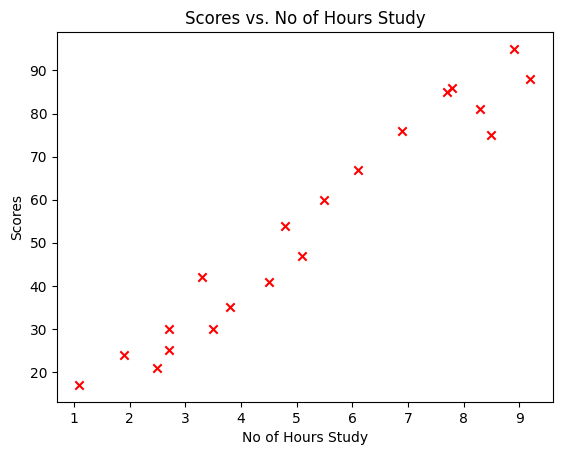

In [41]:
# Create a scatter plot of the data. To change the markers to red "x",
# we used the 'marker' and 'c' parameters
plt.scatter(x_train, y_train, marker='x', c='r') 
# Set the title
plt.title("Scores vs. No of Hours Study")
# Set the y-axis label
plt.ylabel('Scores')
# Set the x-axis label
plt.xlabel('No of Hours Study')
plt.show()

According to above Plot I select linear regression model to fit this data perfectly.
- With this model, the input is No of hours, and have the model estimates Score of the student.

## 5 - Supervised Machine Learning Model using linear regression

To solve problem I try to fit the linear regression parameters $(w,b)$ to dataset.
- The model function for linear regression, which is a function that maps from `x` (Hours) to `y` (Scores) is represented as 
    $$f_{w,b}(x) = wx + b$$
    
#### Compute Cost and Gradient descent

Gradient descent involves repeated steps to adjust the value of your parameter $(w,b)$ to gradually get a smaller and smaller cost $J(w,b)$.
- At each step of gradient descent, it will be helpful for you to monitor your progress by computing the cost $J(w,b)$ as $(w,b)$ gets updated.
- To train a linear regression model, you want to find the best $(w,b)$ parameters that fit your dataset.  

    - To compare how one choice of $(w,b)$ is better or worse than another choice, you can evaluate it with a cost function $J(w,b)$
      - $J$ is a function of $(w,b)$. That is, the value of the cost $J(w,b)$ depends on the value of $(w,b)$.
  
    - The choice of $(w,b)$ that fits your data the best is the one that has the smallest cost $J(w,b)$.


- To find the values $(w,b)$ that gets the smallest possible cost $J(w,b)$, you can use a method called **gradient descent**. 
  - With each step of gradient descent, your parameters $(w,b)$ come closer to the optimal values that will achieve the lowest cost $J(w,b)$.

In [42]:

def compute_cost(x, y, w, b): 
    # number of training examples
    m = x.shape[0] 
    # You need to return this variable correctly
    total_cost = 0
    cost_sum = 0
    for i in range(m):
        f_wb = w*x[i]+b
        cost = (f_wb-y[i])**2
        cost_sum = cost_sum +cost
        total_cost = (1/(2*m))*cost_sum
    return total_cost

In [43]:
def compute_gradient(x, y, w, b):   
    # Number of training examples
    m = x.shape[0]  
    # You need to return the following variables correctly
    dj_dw = 0
    dj_db = 0
    for i in range(m):
        f_wb = w*x[i]+b
        cost = (f_wb-y[i])**2
        dj_dw_i = (f_wb-y[i])*x[i]
        dj_db_i = f_wb-y[i]
        dj_db += dj_db_i
        dj_dw += dj_dw_i
    dj_dw = dj_dw/m
    dj_db = dj_db/m
    return dj_dw, dj_db

In [44]:
def gradient_descent(x, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters): 
    m = len(x)
    # An array to store cost J and w's at each iteration — primarily for graphing later
    J_history = []
    w_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_dw, dj_db = gradient_function(x, y, w, b )  

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               
        b = b - alpha * dj_db               

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            cost =  cost_function(x, y, w, b)
            J_history.append(cost)

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            w_history.append(w)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")
        
    return w, b, J_history, w_history #return w and J,w history for graphing

Now let's run the above gradient descent algorithm above to learn the parameters for our dataset.

In [45]:
# initialize fitting parameters. Recall that the shape of w is (n,)
initial_w = 0.
initial_b = 0.

# some gradient descent settings
iterations = 20
alpha = 0.01

w,b,_,_ = gradient_descent(x_train ,y_train, initial_w, initial_b, 
                     compute_cost, compute_gradient, alpha, iterations)
print("w,b found by gradient descent:", w, b)

Iteration    0: Cost   771.00   
Iteration    2: Cost   154.90   
Iteration    4: Cost    41.20   
Iteration    6: Cost    20.22   
Iteration    8: Cost    16.34   
Iteration   10: Cost    15.63   
Iteration   12: Cost    15.50   
Iteration   14: Cost    15.47   
Iteration   16: Cost    15.47   
Iteration   18: Cost    15.47   
w,b found by gradient descent: [9.97723809] [1.57906712]



    W= 9.9          b=1.5 
  

### Prediction

In [46]:
m = x_train.shape[0]
predicted = np.zeros(m)

for i in range(m):
    predicted[i] = w * x_train[i] + b

Now plot the predicted values to see the linear fit.

Text(0.5, 0, 'Total Hours Study')

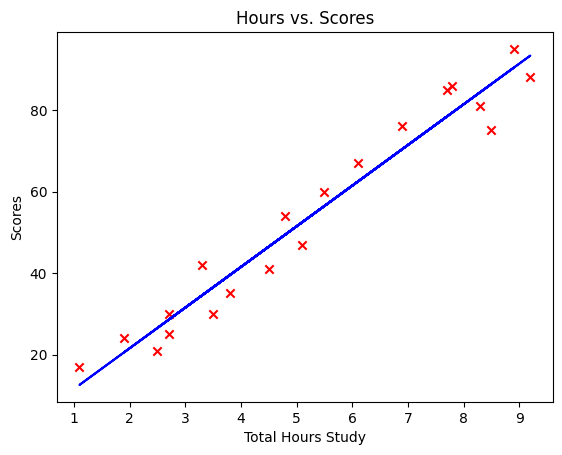

In [47]:
plt.plot(x_train, predicted, c = "b")
# Create a scatter plot of the data. 
plt.scatter(x_train, y_train, marker='x', c='r') 
# Set the title
plt.title("Hours vs. Scores")
# Set the y-axis label
plt.ylabel('Scores')
# Set the x-axis label
plt.xlabel('Total Hours Study')

This above is the Linear regression model.  

#### Now Prediction for 9.25 hrs/day

In [48]:
No_of_hours=9.25
predict1 = No_of_hours * w + b
print('Number of hours = 9.25, Model predict a Score of %.2f' % (predict1))

Number of hours = 9.25, Model predict a Score of 93.87


#### Model Accuracy

In [49]:
from sklearn import metrics  
print('Mean Absolute Error: %.2f'
      %metrics.mean_absolute_error(y_train,predicted)) 

Mean Absolute Error: 5.20


##      Thank You So Much For Your Time!